# Pymaceuticals Analysis

* Although no drugs could reverse the cancer process, mice taking Capomulin got the least metastatic spread (1.48 vs. 2.11-3.36) by the end of the treatment.

* Mice taking Capomulin also had a significantly higher survival rate (84% vs. 36-44%) by the end of the treatment.

* Capomulin is the only drug that decreased tumor volume (by 19%) by the end of the treatment.

* In conclusion, Capomulin has drastically outperformed the other 3 drugs in the group for this clinical trial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

trial_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
drug_df = pd.read_csv("raw_data/mouse_drug_data.csv")

In [2]:
df = pd.merge(drug_df, trial_df, on="Mouse ID")
df = df[df["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"])]
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [3]:
tumor_avg = df.groupby(["Timepoint", "Drug"])[["Tumor Volume (mm3)"]].mean().unstack()
tumor_avg.columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tumor_avg

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [4]:
tumor_sem = df.groupby(["Timepoint", "Drug"])[["Tumor Volume (mm3)"]].sem().unstack()
tumor_sem.columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tumor_sem

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


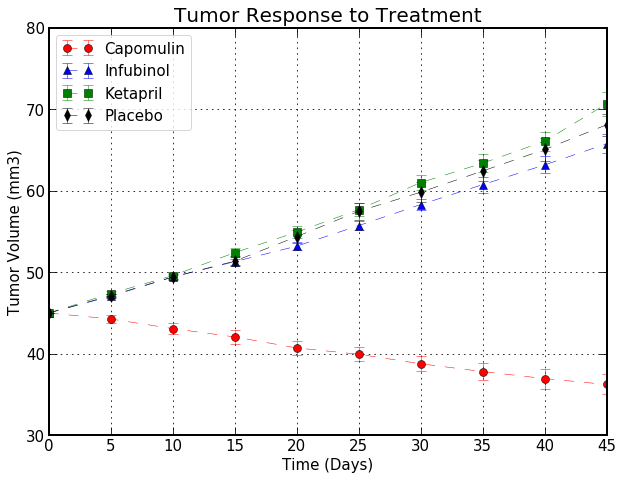

In [5]:
fig, ax = plt.subplots(figsize=(10,7.5))
x = range(0,50,5)
ax.errorbar(x, tumor_avg["Capomulin"], tumor_sem["Capomulin"], fmt="ro--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.errorbar(x, tumor_avg["Infubinol"], tumor_sem["Infubinol"], fmt="b^--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.errorbar(x, tumor_avg["Ketapril"], tumor_sem["Ketapril"], fmt="gs--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.errorbar(x, tumor_avg["Placebo"], tumor_sem["Placebo"], fmt="kd--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.set_title("Tumor Response to Treatment", size=20)
ax.set_xlabel("Time (Days)", size=15)
ax.set_ylabel("Tumor Volume (mm3)", size=15)
ax.get_xaxis().set_tick_params(direction="in", length=8, labelsize=15, top=True)
ax.get_yaxis().set_tick_params(direction="in", length=8, labelsize=15, right=True)
for _ in ["top", "bottom", "left", "right"]:
    ax.spines[_].set_linewidth(2)
ax.set_xlim(0,45)
ax.set_yticks(range(30,90,10))
ax.grid(c="k", ls=":", dashes=(2,5))
ax.legend(fontsize=15, numpoints=2)
plt.show()

## Metastatic Response to Treatment

In [6]:
meta_avg = df.groupby(["Timepoint", "Drug"])[["Metastatic Sites"]].mean().unstack()
meta_avg.columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
meta_avg

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [7]:
meta_sem = df.groupby(["Timepoint", "Drug"])[["Metastatic Sites"]].sem().unstack()
meta_sem.columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
meta_sem

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


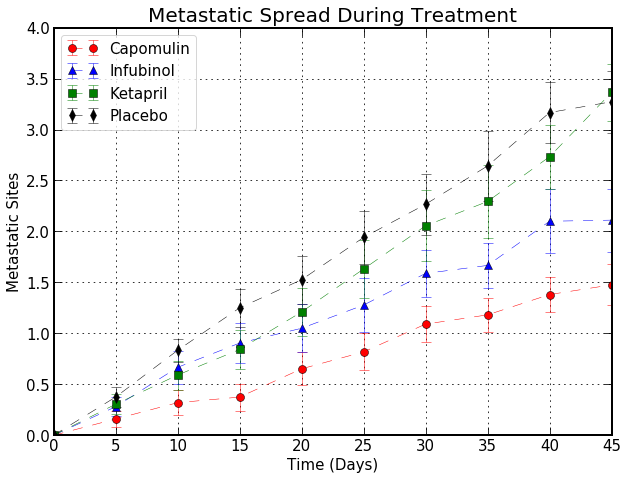

In [8]:
fig, ax = plt.subplots(figsize=(10,7.5))
x = range(0,50,5)
ax.errorbar(x, meta_avg["Capomulin"], meta_sem["Capomulin"], fmt="ro--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.errorbar(x, meta_avg["Infubinol"], meta_sem["Infubinol"], fmt="b^--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.errorbar(x, meta_avg["Ketapril"], meta_sem["Ketapril"], fmt="gs--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.errorbar(x, meta_avg["Placebo"], meta_sem["Placebo"], fmt="kd--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, 
            lw=.5, mec="k", mew=.5)
ax.set_title("Metastatic Spread During Treatment", size=20)
ax.set_xlabel("Time (Days)", size=15)
ax.set_ylabel("Metastatic Sites", size=15)
ax.get_xaxis().set_tick_params(direction="in", length=8, labelsize=15, top=True)
ax.get_yaxis().set_tick_params(direction="in", length=8, labelsize=15, right=True)
for _ in ["top", "bottom", "left", "right"]:
    ax.spines[_].set_linewidth(2)
ax.set_xlim(0,45)
ax.set_ylim(ymin=0)
ax.set_yticks(np.arange(0,4.5,.5))
ax.grid(c="k", ls=":", dashes=(2,5))
ax.legend(fontsize=15, numpoints=2)
plt.show()

## Survival Rates

In [9]:
live_ct = df.groupby(["Timepoint", "Drug"])[["Mouse ID"]].count().unstack()
live_ct.columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
live_rt = pd.DataFrame([live_ct.iloc[:,_]/25*100 for _ in range(4)]).T
live_rt

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


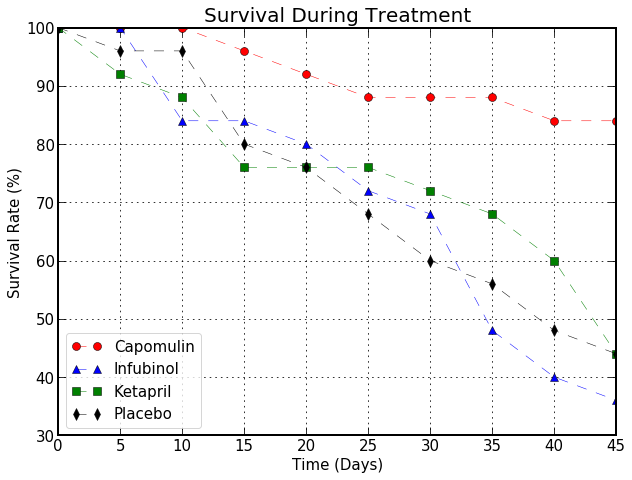

In [10]:
fig, ax = plt.subplots(figsize=(10,7.5))
x = range(0,50,5)
ax.errorbar(x, live_rt["Capomulin"], fmt="ro--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, lw=.5, mec="k", mew=.5)
ax.errorbar(x, live_rt["Infubinol"], fmt="b^--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, lw=.5, mec="k", mew=.5)
ax.errorbar(x, live_rt["Ketapril"], fmt="gs--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, lw=.5, mec="k", mew=.5)
ax.errorbar(x, live_rt["Placebo"], fmt="kd--", ms=8, dashes=(20,20), elinewidth=.5, capsize=5, lw=.5, mec="k", mew=.5)
ax.set_title("Survival During Treatment", size=20)
ax.set_xlabel("Time (Days)", size=15)
ax.set_ylabel("Survival Rate (%)", size=15)
ax.get_xaxis().set_tick_params(direction="in", length=8, labelsize=15, top=True)
ax.get_yaxis().set_tick_params(direction="in", length=8, labelsize=15, right=True)
for _ in ["top", "bottom", "left", "right"]:
    ax.spines[_].set_linewidth(2)
ax.set_xlim(0,45)
ax.set_ylim(30,100)
ax.grid(c="k", ls=":", dashes=(2,5))
ax.legend(fontsize=15, numpoints=2)
plt.show()

## Summary Bar Graph

In [11]:
tumor_change = [(tumor_avg.iloc[-1,_]-tumor_avg.iloc[0,_])/tumor_avg.iloc[0,_]*100 for _ in range(4)]
tumor_change

[-19.475302667894173, 46.12347172785187, 57.028794686606076, 51.29796048315153]

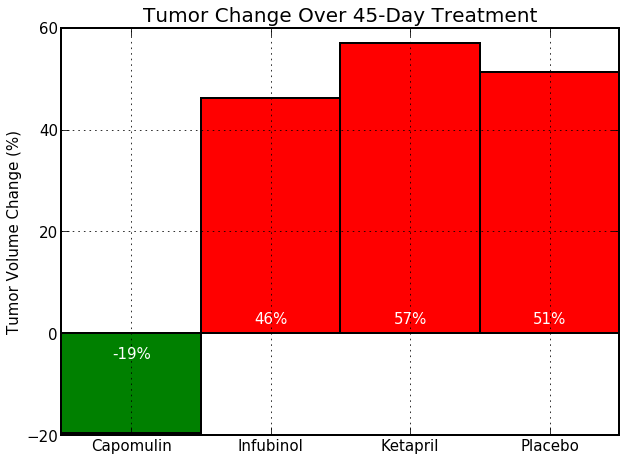

In [12]:
fig, ax = plt.subplots(figsize=(10,7.5))
plt.bar(range(4), tumor_change, width=1, color=["g","r","r","r"], ec="k", lw=2)
plt.title("Tumor Change Over 45-Day Treatment", size=20)
plt.ylabel("Tumor Volume Change (%)", size=15)
ax.get_xaxis().set_tick_params(direction="in", length=8, labelsize=15, top=True)
ax.get_yaxis().set_tick_params(direction="in", length=8, labelsize=15, right=True)
for _ in ["top", "bottom", "left", "right"]:
    ax.spines[_].set_linewidth(2)
plt.xlim(-0.5,3.5)
plt.ylim(-20,60)
plt.xticks(range(4), tumor_avg.columns.values)
plt.yticks(range(-20,80,20))
for x, y in zip(range(4), [-5,2,2,2]):
    plt.text(x, y, f"{int(tumor_change[x])}%", color="w", fontsize=15, ha="center")
plt.grid(c="k", ls=":", dashes=(2,5))
plt.show()